##  决策树回归

(1000, 10) (1000,)
决策树回归器的均方误差: 481.29
决策树回归器的决定系数(R²): 0.88


C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


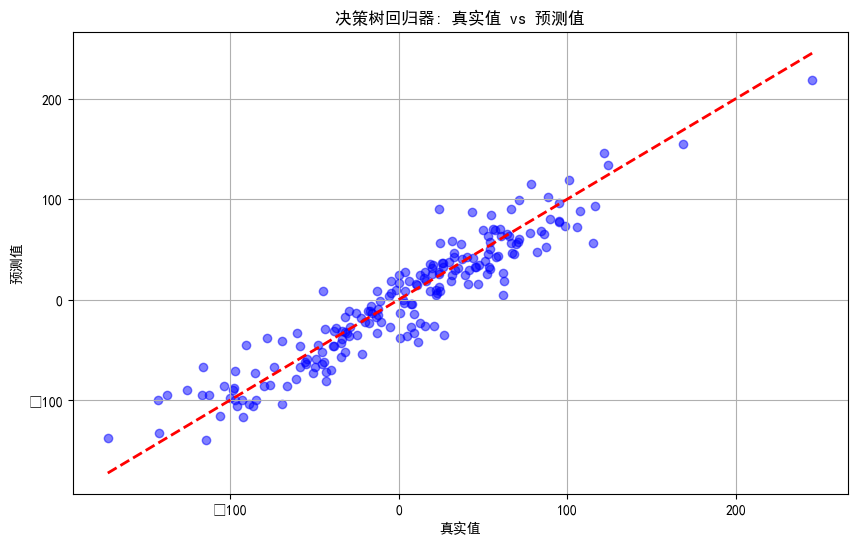

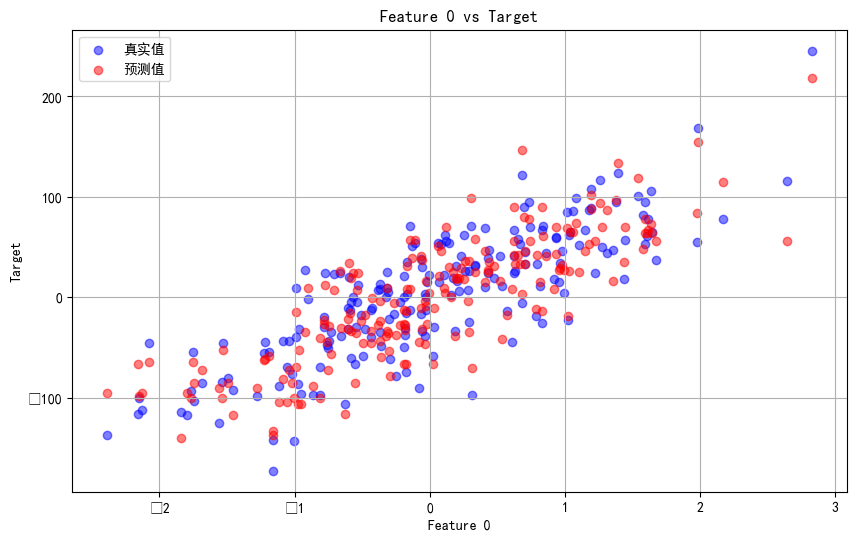

In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 生成示例回归数据集
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=0.1, random_state=42)
print(X.shape, y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树回归器
dt_regressor = DecisionTreeRegressor(random_state=42)

# 训练模型
dt_regressor.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = dt_regressor.predict(X_test)

# 计算均方误差和决定系数
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"决策树回归器的均方误差: {mse:.2f}")
print(f"决策树回归器的决定系数(R²): {r2:.2f}")

# 结果可视化 - 绘制预测值 vs 真实值
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 对角线
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('决策树回归器: 真实值 vs 预测值')
plt.grid(True)
plt.show()

# 如果想要查看某个特征与其对应的目标变量的关系（这里以第一个特征为例）
feature_idx = 0
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_idx], y_test, color='blue', label='真实值', alpha=0.5)
plt.scatter(X_test[:, feature_idx], y_pred, color='red', label='预测值', alpha=0.5)
plt.xlabel(f'Feature {feature_idx}')
plt.ylabel('Target')
plt.legend()
plt.title(f'Feature {feature_idx} vs Target')
plt.grid(True)
plt.show()

## 随机森林回归

随机森林回归器的均方误差: 208.08
随机森林回归器的决定系数(R²): 0.95


C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


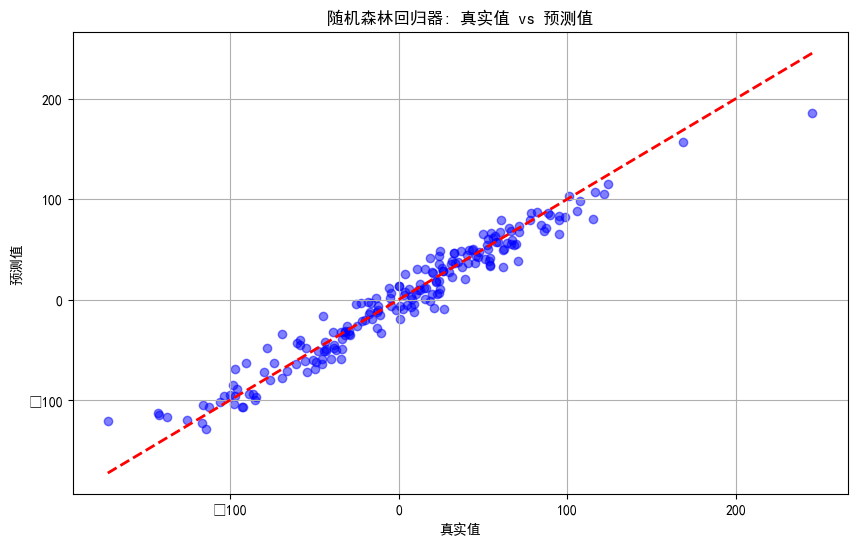

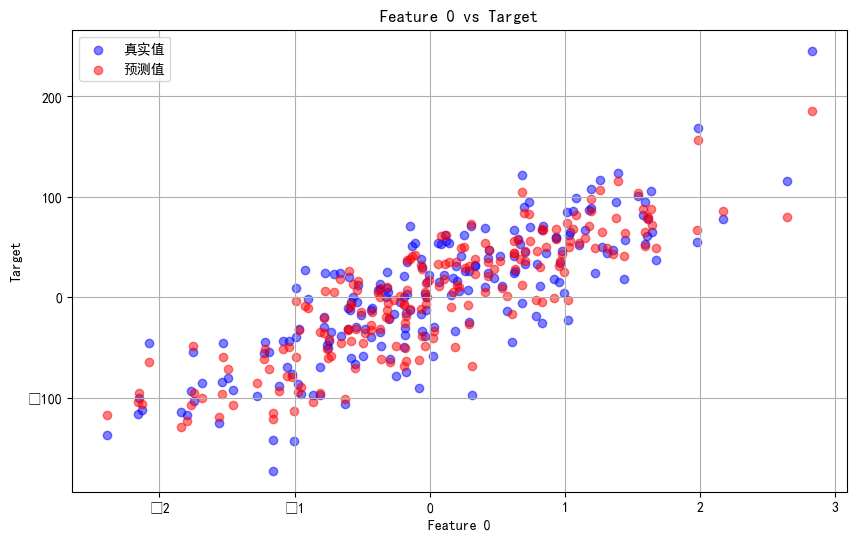

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 生成示例回归数据集
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=0.1, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归器
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_regressor.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_regressor.predict(X_test)

# 计算均方误差和决定系数
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"随机森林回归器的均方误差: {mse:.2f}")
print(f"随机森林回归器的决定系数(R²): {r2:.2f}")

# 结果可视化 - 绘制预测值 vs 真实值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 对角线
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('随机森林回归器: 真实值 vs 预测值')
plt.grid(True)
plt.show()

# 如果想要查看某个特征与其对应的目标变量的关系（这里以第一个特征为例）
feature_idx = 0
sorted_idx = X_test[:, feature_idx].argsort()
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_idx], y_test, color='blue', label='真实值', alpha=0.5)
plt.scatter(X_test[:, feature_idx][sorted_idx], y_pred[sorted_idx], color='red', label='预测值', alpha=0.5)
plt.xlabel(f'Feature {feature_idx}')
plt.ylabel('Target')
plt.legend()
plt.title(f'Feature {feature_idx} vs Target')
plt.grid(True)
plt.show()